<a href="https://colab.research.google.com/github/fowardelcac/Abandono-Escolar/blob/main/Notebooks/conlusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/fowardelcac/Abandono-Escolar.git

Cloning into 'Abandono-Escolar'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 115 (delta 39), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (115/115), 1.11 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
def descargar_data():
  data = pd.read_csv('https://raw.githubusercontent.com/fowardelcac/Abandono-Escolar/main/Dataset/dataset.csv')
  return data.filter(['Course', 'International',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)', 'Target'], axis = 1)

In [52]:
def edit(data):
    df = pd.DataFrame({
        'Scholarship': data['Scholarship holder'],
        'Enrolled1': data['Curricular units 1st sem (enrolled)'],
        'Approved1': data['Curricular units 1st sem (approved)'],
        'Enrolled2': data['Curricular units 2nd sem (enrolled)'],
        'Approved2': data['Curricular units 2nd sem (approved)'],
        'Gender': data['Gender'],
        'Age at enrollment': data['Age at enrollment'],
        'International': data['International'],
        'Course': data['Course']
    })

    df['Target'] = data['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}).copy()

    categorias = {
    'Tecnología y Diseño': [2, 5, 7],
    'Agronomía y Ciencias Veterinarias': [4, 6, 8],
    'Servicios Sociales y Salud': [3, 10, 12, 13],
    'Negocios y Comunicación': [5, 9, 17, 14, 15],
    'Turismo': [11],
    'Educación': [16],
    'Energías Renovables': [1]
    }
    df['Area'] = df['Course'].apply(lambda x: next((sector for sector, carreras in categorias.items() if x in carreras), None))
    df = df[df.Target != 2]
    return df

In [53]:
def frecuencia_relativa(muestra, subconjunto):
  N = len(muestra)
  return ((len(subconjunto) / N) * 100)


In [54]:
data = descargar_data()
df = edit(data)
df.head()

,Scholarship,Enrolled1,Approved1,Enrolled2,Approved2,Gender,Age at enrollment,International,Course,Target,Area
0,0,0,0,0,0,1,20,0,2,0,Tecnología y Diseño
1,0,6,6,6,6,1,19,0,11,1,Turismo
2,0,6,0,6,0,1,19,0,5,0,Tecnología y Diseño
3,0,6,6,6,5,0,20,0,15,1,Negocios y Comunicación
4,0,6,5,6,6,0,45,0,3,1,Servicios Sociales y Salud


In [57]:
def barras_target(df):
  sns.countplot(data = df, x = 'Target', palette = {0: "red", 1: "green"})
  plt.title("Grafico de barras sobre la variable objetivo.")
  plt.xlabel("Estado")
  plt.xticks(ticks=[0,1], labels=["Abandondo", "Graduado"])
  plt.show()

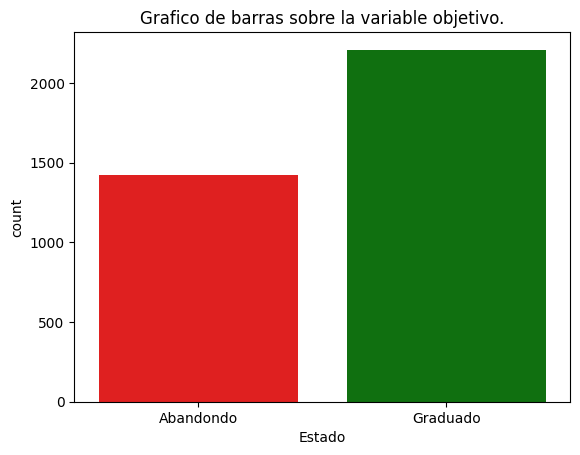

In [58]:
barras_target(df)

# El conjunto de datos consta de tres estados principales: abandono (32.12%), cursando (17.94%) y graduados (49.9%). Nuestro interés principal en este conjunto de datos se centra en comprender las razones detrás del abandono y la graduación de los estudiantes. Por lo tanto, nos enfocaremos exclusivamente en el análisis de estas dos variables.

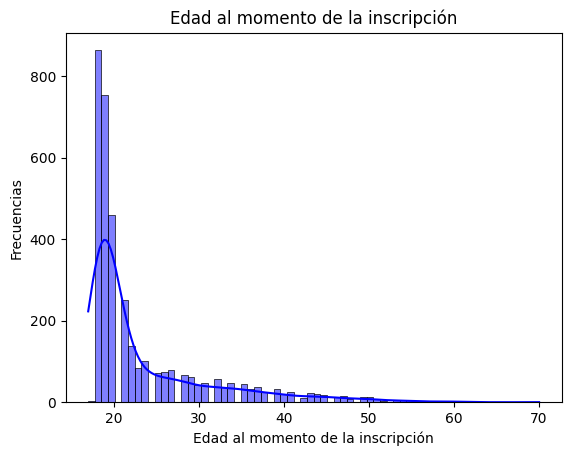

In [59]:
def edad_plot(df):
  sns.histplot(df['Age at enrollment'], kde=True, color='blue')  # kde=True agrega una estimación de la densidad del kernel.
  plt.xlabel('Edad al momento de la inscripción')
  plt.ylabel('Frecuencias')
  plt.title('Edad al momento de la inscripción')
  plt.show()
edad_plot(df)

In [60]:
df['Age at enrollment'].describe()


count    3630.000000
mean       23.461157
std         7.827994
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

Apartir del grafico y algunos estadisticos, podemos ver que el 75% de los estudiantes se inscriben para comenzar sus estudios universitarios entre los 17 y 25 años

In [62]:
def sexos(df):
  sns.countplot(x='Gender', data=df)
  plt.ylabel("Frecuencia")
  plt.xlabel("Género")
  plt.title("Sexo masculino vs femenino")
  plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])
  plt.show()

def sexos_vs_estado(df):
  plt.figure(figsize=(10, 6))  # Tamaño de la figura
  sns.countplot(data = df, x ='Gender', hue = 'Target', palette = {0: "red", 1: "green"})
  # Personalizar el gráfico
  plt.title("Estado de cursado segun el sexo.")
  plt.xlabel("Genero")
  plt.ylabel("Estado")
  plt.legend(title = "Estado", labels=["Abandono", "Graduado"])
  plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])
  # Mostrar el gráfico
  plt.show()


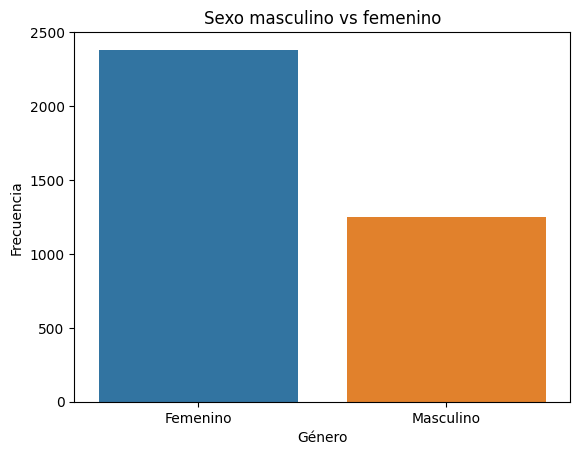

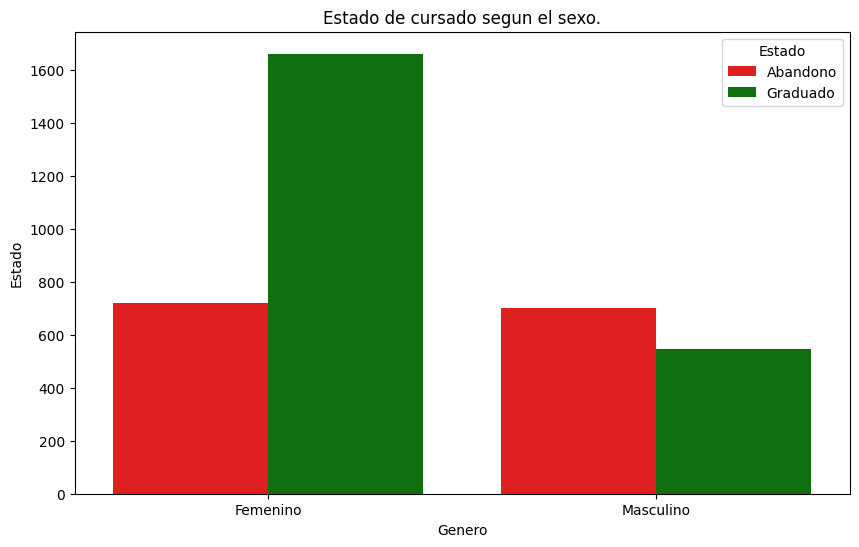

In [63]:
sexos(df)
sexos_vs_estado(df)

In [64]:
print(f'Proporccion de hombres con respecto a la muestra: {frecuencia_relativa(df, df[df.Gender == 1]):.2f}%')
print(f'Proporccion de mujeres con respecto a la muestra: {frecuencia_relativa(df, df[df.Gender == 0]):.2f}%')

Proporccion de hombres con respecto a la muestra: 34.41%
Proporccion de mujeres con respecto a la muestra: 65.59%


In [65]:
df_graduate = df[df.Target == 1]
h = frecuencia_relativa(df_graduate, df_graduate[df_graduate.Gender == 1])
m = frecuencia_relativa(df_graduate, df_graduate[df_graduate.Gender == 0])
print(f'Cada 100 estudiantes graduados hay: {h:.2f} hombres y {m:.2f} mujeres')

Cada 100 estudiantes graduados hay: 24.81 hombres y 75.19 mujeres


# Claramente podemos ver que Las mujeres se graduan tres veces mas que los hombres, pero a su vez dentro de la muestra existe casi el doble(1.9 veces mas) de mujeres que hombres, podriamos asumir que existe algun tipo de sesgo no intencional en la muestra cometido durante el censado

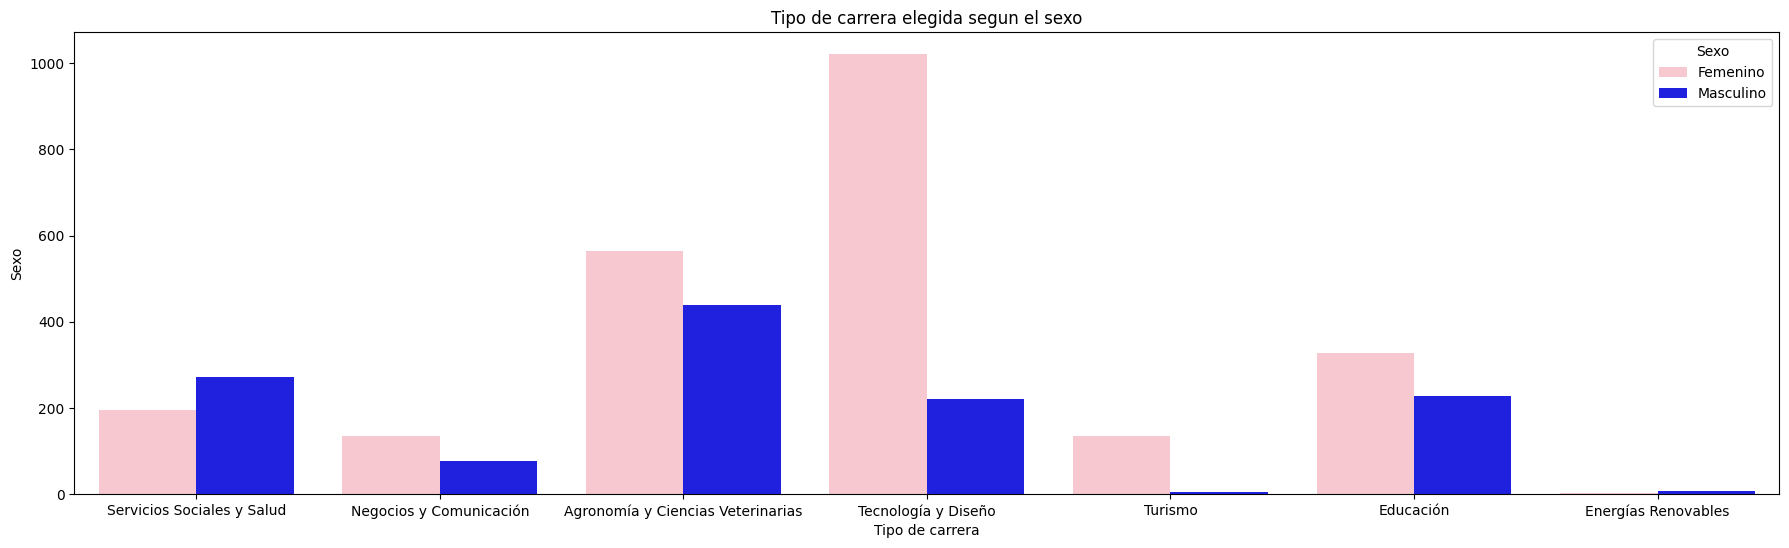

In [66]:
dic = (df.Area.value_counts()).to_dict()
def areas_plot(df):
  plt.figure(figsize=(22, 6))  # Tamaño de la figura
  sns.countplot(data = df, x ='Area', hue = 'Gender', palette = {0: "pink", 1: "blue"})
  # Personalizar el gráfico
  plt.title("Tipo de carrera elegida segun el sexo")
  plt.xlabel("Tipo de carrera")
  plt.ylabel("Sexo")
  plt.legend(title = "Sexo", labels=['Femenino','Masculino'])
  plt.xticks(ticks=range(len(dic)), labels=dic.keys())
  # Mostrar el gráfico
  plt.show()
areas_plot(df)

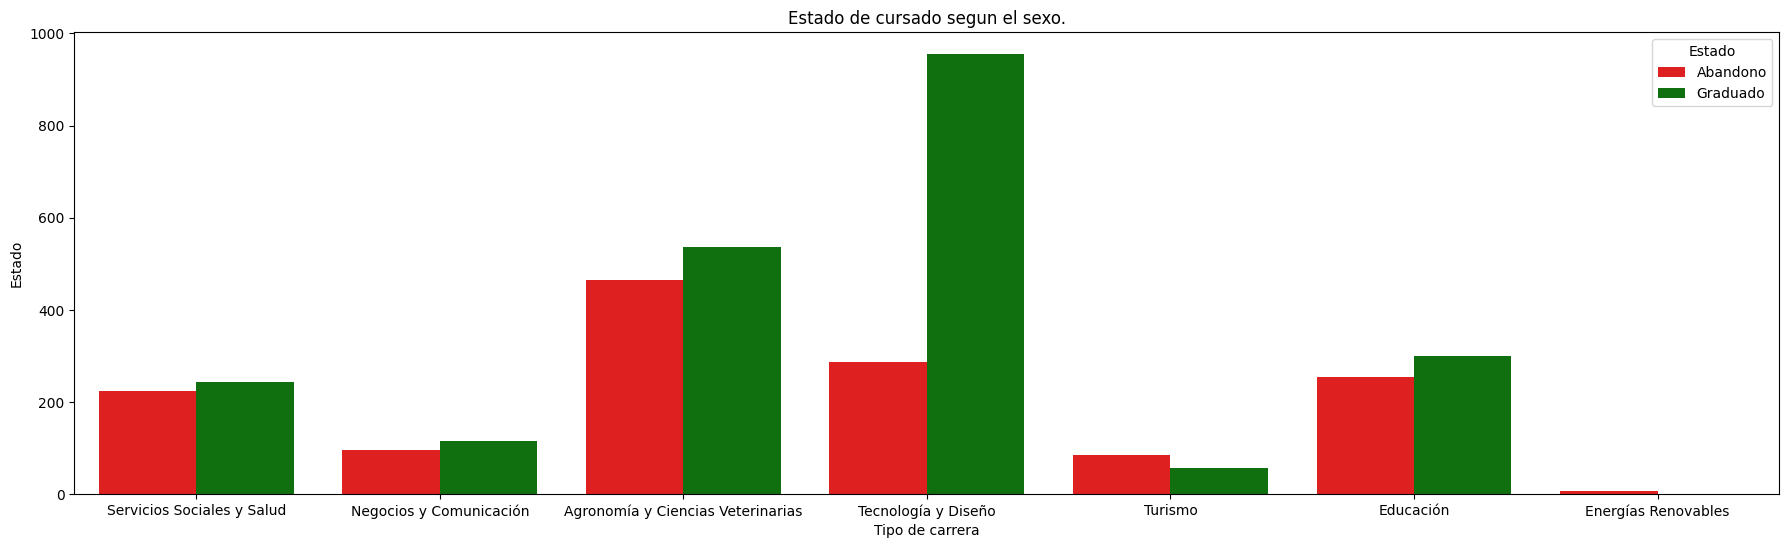

In [67]:
def area_vs_target(df):
  plt.figure(figsize=(22, 6))
  sns.countplot(data = df, x ='Area', hue = 'Target',  palette = {0: "red", 1: "green"})
  plt.title("Estado de cursado segun el sexo.")
  plt.xlabel("Tipo de carrera")
  plt.ylabel("Estado")
  plt.legend(title = "Estado", labels=["Abandono", "Graduado"])
  plt.xticks(ticks=range(len(dic)), labels=dic.keys())
  plt.show()

area_vs_target(df)

## Se puede apreciar que los dos sectores 'Tecnologia y diseño' y 'Agronomia y ciencias veterinarias' son las carreras con mas graduados, y si observamos en el primer grafico vemos que ambas carreras cuentran con un mayor cursado de mujeres, podriamos suponer que esto podria generar una influencia en el porque las mujeres se graduan tres veces mas que los hombres

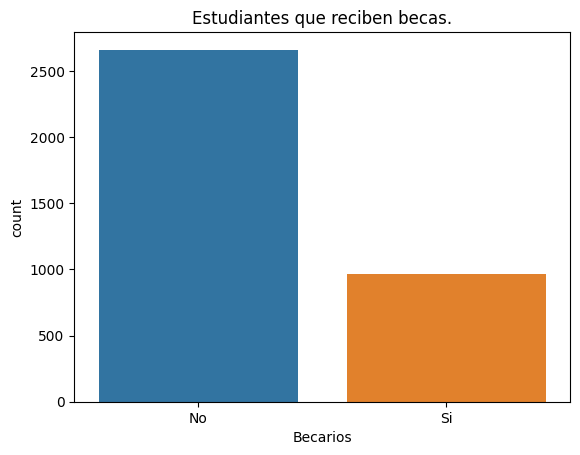

In [69]:
def becas_plot(df):
  sns.countplot(x='Scholarship', data=df)
  plt.xlabel("Becarios")
  plt.title("Estudiantes que reciben becas.")
  plt.xticks(ticks=[0,1], labels=['No','Si'])
  plt.show()
becas_plot(df)

El 27% de los alumnos recibem becas

In [83]:
def bexas_x_sexo(data):
    data_becarios = data[data.Scholarship == 1]
    plt.title("Estudiantes que reciben becas comparados por sexo")
    sns.countplot(data=data_becarios, x='Scholarship', hue='Gender', palette={0: "pink", 1: "blue"})
    plt.legend(title="Sexo", labels=['Femenino', 'Masculino'])
    plt.xlabel("Becarios")
    plt.xticks(ticks=[0], labels=[])
    plt.tight_layout()

def becas_x_nacionalidad(data):
    data_becarios = data[data.Scholarship == 1]
    plt.title("Estudiantes que reciben becas comparados por nacionalidad")
    sns.countplot(data=data_becarios, x='Scholarship', hue='International', palette={0: "blue", 1: "yellow"})
    plt.legend(title="Nacionalidad", labels=['Nativo', 'Extranjero'])
    plt.xlabel("Becarios")
    plt.xticks(ticks=[0], labels=[])
    plt.tight_layout()


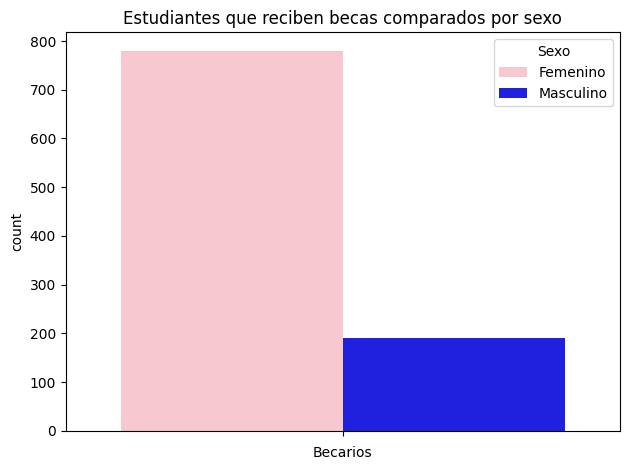

In [85]:
bexas_x_sexo(df)

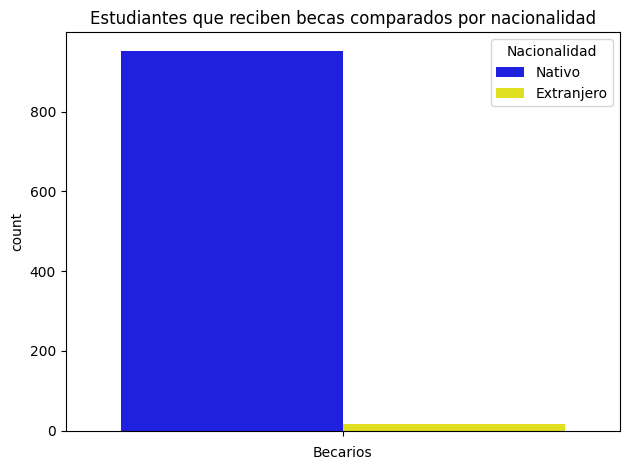

In [86]:
becas_x_nacionalidad(df)

In [88]:
def sub_por_carrera(data):
  data_becarios = data[data.Scholarship == 1]
  plt.figure(figsize=(22, 6))  # Tamaño de la figura
  sns.countplot(data = data_becarios, x ='Area', hue = 'Scholarship',  palette = {1: "green"})
  # Personalizar el gráfico
  plt.title("Tipo de carrera mas subsidiada.")
  plt.xlabel("Tipo de carrera")
  plt.ylabel("Becas")
  plt.legend(title = "Becas", labels=["No", "Si"])
  plt.xticks(ticks=range(len(dic)), labels=dic.keys())
  # Mostrar el gráfico
  plt.show()

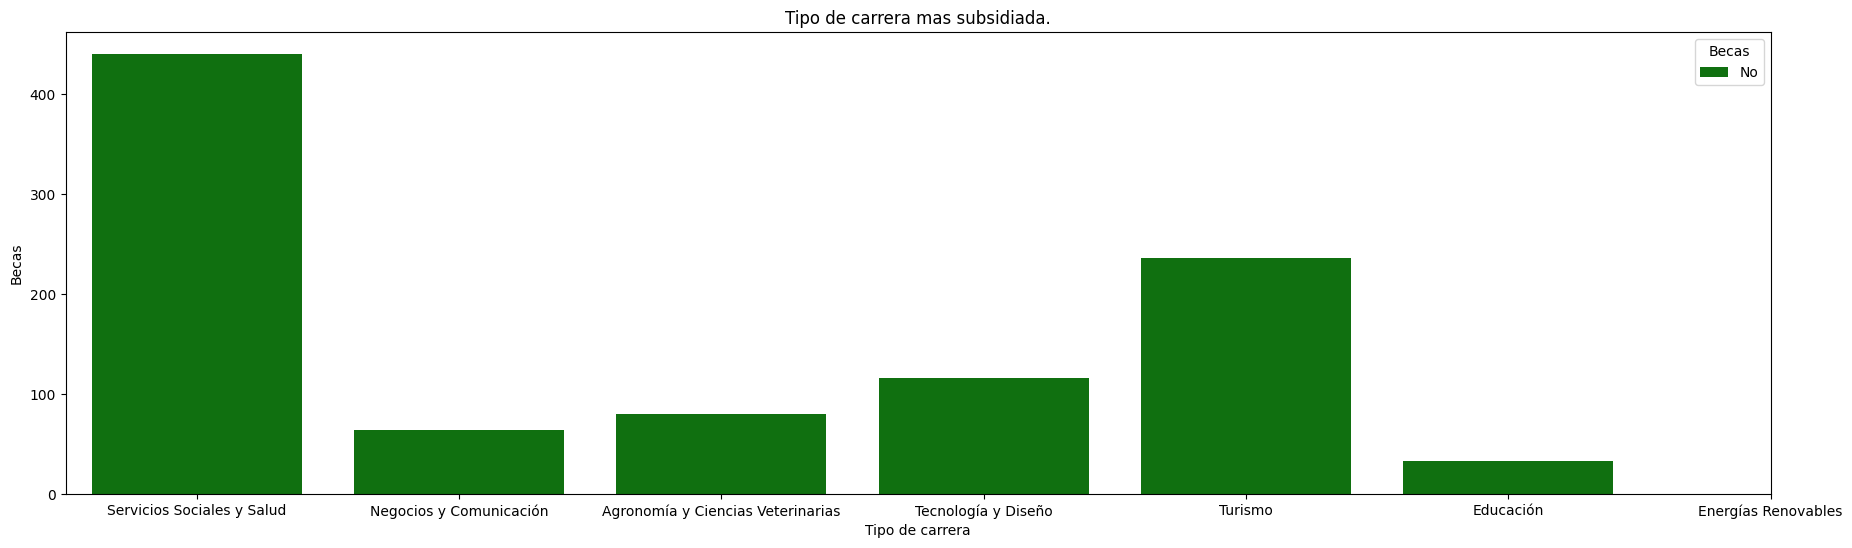

In [89]:
sub_por_carrera(df)

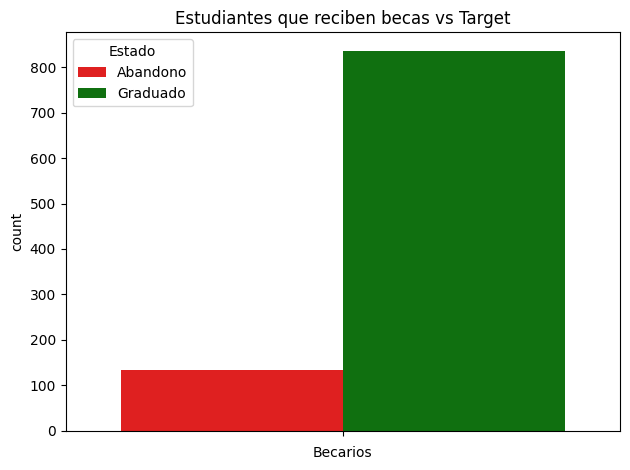

In [91]:
def becarios_x_target(data):
  data_becarios = data[data.Scholarship == 1]
  sns.countplot(data_becarios, x ='Scholarship', hue = 'Target', palette = {0: "red", 1: "green"})
  plt.title("Estudiantes que reciben becas vs Target")
  plt.legend(title = "Estado", labels=["Abandono", "Graduado"])
  plt.xlabel("Becarios")
  plt.xticks(ticks=[0], labels=[])
  plt.tight_layout()
becarios_x_target(df)

# Dentro de la universidad existen 969 estudiantes cursando gracias a becas universitarias, donde la mayoria son mujeres y el pais de origen no tiene ninguna influencia. La universidad financia principalmentre dos areas 'Servicios sociales y salud' que incluye: Servicio social, enfermeria y higiene oral, y 'Turismo'. Tambien es posible ver que los estudiantes que han recibido becas tienen mayor tasa de exito.

In [96]:
df

,Scholarship,Enrolled1,Approved1,Enrolled2,Approved2,Gender,Age at enrollment,International,Course,Target,Area
0,0,0,0,0,0,1,20,0,2,0,Tecnología y Diseño
1,0,6,6,6,6,1,19,0,11,1,Turismo
2,0,6,0,6,0,1,19,0,5,0,Tecnología y Diseño
3,0,6,6,6,5,0,20,0,15,1,Negocios y Comunicación
4,0,6,5,6,6,0,45,0,3,1,Servicios Sociales y Salud
...,...,...,...,...,...,...,...,...,...,...,...
4419,0,6,5,6,5,1,19,0,15,1,Negocios y Comunicación
4420,0,6,6,6,2,0,18,1,15,0,Negocios y Comunicación
4421,1,7,7,8,1,0,30,0,12,0,Servicios Sociales y Salud
4422,1,5,5,5,5,0,20,0,9,1,Negocios y Comunicación
